German Credit Dataset

Preprocessing

In [1]:
import numpy as np
import pandas as pd
from pandas import Series
from pandas import DataFrame

In [2]:
#Drop the 3 columns that contribute the least to the dataset. These would be the columns with the highest number of non-zero 'none' values. Break ties by going left to right in columns.
german_credit = pd.read_csv('GermanCredit.csv')
info = german_credit.isin(['none']).sum().sort_values(ascending=False)
info

other_parties             907
other_payment_plans       814
own_telephone             596
checking_status             0
property_magnitude          0
foreign_worker              0
num_dependents              0
job                         0
existing_credits            0
housing                     0
age                         0
residence_since             0
duration                    0
personal_status             0
installment_commitment      0
employment                  0
savings_status              0
credit_amount               0
purpose                     0
credit_history              0
class                       0
dtype: int64

In [3]:
n = 3
for i in range(n):
    german_credit = german_credit.drop(axis=1, columns=info.keys()[i])
german_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   checking_status         1000 non-null   object
 1   duration                1000 non-null   int64 
 2   credit_history          1000 non-null   object
 3   purpose                 1000 non-null   object
 4   credit_amount           1000 non-null   int64 
 5   savings_status          1000 non-null   object
 6   employment              1000 non-null   object
 7   installment_commitment  1000 non-null   int64 
 8   personal_status         1000 non-null   object
 9   residence_since         1000 non-null   int64 
 10  property_magnitude      1000 non-null   object
 11  age                     1000 non-null   int64 
 12  housing                 1000 non-null   object
 13  existing_credits        1000 non-null   int64 
 14  job                     1000 non-null   object
 15  num_d

In [4]:
#Certain values in some of the columns contain unnecessary apostrophes (‘). Remove the apostrophes.
german_credit.replace("\'", "", regex=True, inplace=True)
german_credit

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,4,real estate,67,own,2,skilled,1,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,2,real estate,22,own,1,skilled,1,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,3,real estate,49,own,1,unskilled resident,2,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,4,life insurance,45,for free,1,skilled,2,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,4,no known property,53,for free,2,skilled,2,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12,existing paid,furniture/equipment,1736,<100,4<=X<7,3,female div/dep/mar,4,real estate,31,own,1,unskilled resident,1,yes,good
996,<0,30,existing paid,used car,3857,<100,1<=X<4,4,male div/sep,4,life insurance,40,own,1,high qualif/self emp/mgmt,1,yes,good
997,no checking,12,existing paid,radio/tv,804,<100,>=7,4,male single,4,car,38,own,1,skilled,1,yes,good
998,<0,45,existing paid,radio/tv,1845,<100,1<=X<4,4,male single,4,no known property,23,for free,1,skilled,1,yes,bad


In [5]:
#The checking_status column has values in 4 categories: 'no checking', '<0', '0<=X<200', and '>=200'. Change these to 'No Checking', 'Low', 'Medium', and 'High' respectively.
german_credit['checking_status'] = german_credit['checking_status'].replace(['no checking', '<0', '0<=X<200', '>=200'], ['No Checking', 'Low', 'Medium', 'High'])
german_credit

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,Low,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,4,real estate,67,own,2,skilled,1,yes,good
1,Medium,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,2,real estate,22,own,1,skilled,1,yes,bad
2,No Checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,3,real estate,49,own,1,unskilled resident,2,yes,good
3,Low,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,4,life insurance,45,for free,1,skilled,2,yes,good
4,Low,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,4,no known property,53,for free,2,skilled,2,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,No Checking,12,existing paid,furniture/equipment,1736,<100,4<=X<7,3,female div/dep/mar,4,real estate,31,own,1,unskilled resident,1,yes,good
996,Low,30,existing paid,used car,3857,<100,1<=X<4,4,male div/sep,4,life insurance,40,own,1,high qualif/self emp/mgmt,1,yes,good
997,No Checking,12,existing paid,radio/tv,804,<100,>=7,4,male single,4,car,38,own,1,skilled,1,yes,good
998,Low,45,existing paid,radio/tv,1845,<100,1<=X<4,4,male single,4,no known property,23,for free,1,skilled,1,yes,bad


In [6]:
#The savings_status column has values in 4 categories: 'no known savings', '<100', '100<=X<500', '500<=X<1000', and '>=1000'.
#Change these to 'No Savings', 'Low', 'Medium', 'High', and 'High' respectively.
german_credit['savings_status'] = german_credit['savings_status'].replace(['no known savings', '<100', '100<=X<500', '500<=X<1000', '>=1000'], ['No Savings', 'Low', 'Medium', 'High', 'High'])
german_credit

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,Low,6,critical/other existing credit,radio/tv,1169,No Savings,>=7,4,male single,4,real estate,67,own,2,skilled,1,yes,good
1,Medium,48,existing paid,radio/tv,5951,Low,1<=X<4,2,female div/dep/mar,2,real estate,22,own,1,skilled,1,yes,bad
2,No Checking,12,critical/other existing credit,education,2096,Low,4<=X<7,2,male single,3,real estate,49,own,1,unskilled resident,2,yes,good
3,Low,42,existing paid,furniture/equipment,7882,Low,4<=X<7,2,male single,4,life insurance,45,for free,1,skilled,2,yes,good
4,Low,24,delayed previously,new car,4870,Low,1<=X<4,3,male single,4,no known property,53,for free,2,skilled,2,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,No Checking,12,existing paid,furniture/equipment,1736,Low,4<=X<7,3,female div/dep/mar,4,real estate,31,own,1,unskilled resident,1,yes,good
996,Low,30,existing paid,used car,3857,Low,1<=X<4,4,male div/sep,4,life insurance,40,own,1,high qualif/self emp/mgmt,1,yes,good
997,No Checking,12,existing paid,radio/tv,804,Low,>=7,4,male single,4,car,38,own,1,skilled,1,yes,good
998,Low,45,existing paid,radio/tv,1845,Low,1<=X<4,4,male single,4,no known property,23,for free,1,skilled,1,yes,bad


In [7]:
#Change class column values from 'good' to '1' and 'bad' to '0'
german_credit['class'] = german_credit['class'].replace(['good', 'bad'], ['1', '0'])
german_credit

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,Low,6,critical/other existing credit,radio/tv,1169,No Savings,>=7,4,male single,4,real estate,67,own,2,skilled,1,yes,1
1,Medium,48,existing paid,radio/tv,5951,Low,1<=X<4,2,female div/dep/mar,2,real estate,22,own,1,skilled,1,yes,0
2,No Checking,12,critical/other existing credit,education,2096,Low,4<=X<7,2,male single,3,real estate,49,own,1,unskilled resident,2,yes,1
3,Low,42,existing paid,furniture/equipment,7882,Low,4<=X<7,2,male single,4,life insurance,45,for free,1,skilled,2,yes,1
4,Low,24,delayed previously,new car,4870,Low,1<=X<4,3,male single,4,no known property,53,for free,2,skilled,2,yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,No Checking,12,existing paid,furniture/equipment,1736,Low,4<=X<7,3,female div/dep/mar,4,real estate,31,own,1,unskilled resident,1,yes,1
996,Low,30,existing paid,used car,3857,Low,1<=X<4,4,male div/sep,4,life insurance,40,own,1,high qualif/self emp/mgmt,1,yes,1
997,No Checking,12,existing paid,radio/tv,804,Low,>=7,4,male single,4,car,38,own,1,skilled,1,yes,1
998,Low,45,existing paid,radio/tv,1845,Low,1<=X<4,4,male single,4,no known property,23,for free,1,skilled,1,yes,0


In [8]:
#Change the employment column value 'unemployed' to 'Unemployed', and for the others, change to 'Amateur', 'Professional', 'Experienced' and 'Expert', depending on year range.
german_credit['employment'].unique()

array(['>=7', '1<=X<4', '4<=X<7', 'unemployed', '<1'], dtype=object)

In [9]:
german_credit['employment'] = german_credit['employment'].replace(['>=7', '1<=X<4', '4<=X<7', 'unemployed', '<1'], ['Expert', 'Porfessional', 'Experienced', 'Unemployed', 'Amateur'])
german_credit

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,Low,6,critical/other existing credit,radio/tv,1169,No Savings,Expert,4,male single,4,real estate,67,own,2,skilled,1,yes,1
1,Medium,48,existing paid,radio/tv,5951,Low,Porfessional,2,female div/dep/mar,2,real estate,22,own,1,skilled,1,yes,0
2,No Checking,12,critical/other existing credit,education,2096,Low,Experienced,2,male single,3,real estate,49,own,1,unskilled resident,2,yes,1
3,Low,42,existing paid,furniture/equipment,7882,Low,Experienced,2,male single,4,life insurance,45,for free,1,skilled,2,yes,1
4,Low,24,delayed previously,new car,4870,Low,Porfessional,3,male single,4,no known property,53,for free,2,skilled,2,yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,No Checking,12,existing paid,furniture/equipment,1736,Low,Experienced,3,female div/dep/mar,4,real estate,31,own,1,unskilled resident,1,yes,1
996,Low,30,existing paid,used car,3857,Low,Porfessional,4,male div/sep,4,life insurance,40,own,1,high qualif/self emp/mgmt,1,yes,1
997,No Checking,12,existing paid,radio/tv,804,Low,Expert,4,male single,4,car,38,own,1,skilled,1,yes,1
998,Low,45,existing paid,radio/tv,1845,Low,Porfessional,4,male single,4,no known property,23,for free,1,skilled,1,yes,0


Analysis

In [10]:
#Get the count of each category of foreign workers (yes and no) for each class of credit (good and bad).
pd.crosstab(german_credit['foreign_worker'], german_credit['class'])

class,0,1
foreign_worker,,
no,4,33
yes,296,667


In [11]:
#get the count of each category of employment for each category of saving_status.
pd.crosstab(german_credit['employment'], german_credit['savings_status'])

savings_status,High,Low,Medium,No Savings
employment,,,,
Amateur,12,120,17,23
Experienced,18,100,24,32
Expert,34,133,22,64
Porfessional,44,210,33,52
Unemployed,3,40,7,12


In [12]:
#Find the average credit_amount of single males that have 4<=X<7 years of employment. You can leave the raw result as is, no need for rounding.
avg_Experienced = german_credit['credit_amount'].groupby(german_credit['employment']).mean().get('Experienced')
avg_Experienced

3601.6954022988507

In [13]:
#Find the average credit duration for each of the job types. You can leave the raw result as is, no need for rounding.
avg_duration = german_credit['duration'].groupby(german_credit['job']).mean()
avg_duration

job
high qualif/self emp/mgmt    25.168919
skilled                      21.411111
unemp/unskilled non res      17.363636
unskilled resident           16.535000
Name: duration, dtype: float64

In [14]:
result_checking = german_credit['checking_status'].groupby(german_credit['purpose']).value_counts().get('education').idxmax()
result_saving = german_credit['savings_status'].groupby(german_credit['purpose']).value_counts().get('education').idxmax()
print('Most common checking status: ' + result_checking)
print('Most common savings status: ' + result_saving)

Most common checking status: No Checking
Most common savings status: Low


Visualization

In [15]:
from matplotlib import pyplot as plt

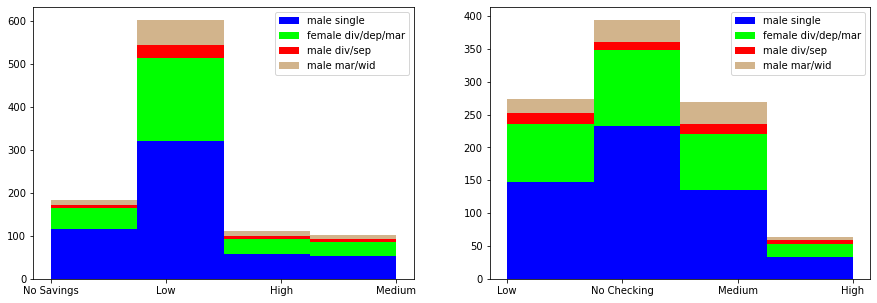

In [16]:
#Plot subplots of two histograms: one with savings_status on the x-axis and personal_status as different colors.checking_status on the x-axis and personal_status as different colors.
fig, ax = plt.subplots(1,2,figsize=(15,5))

colors = ['blue', 'lime', 'red','tan']
kind_savings = german_credit['savings_status'].unique()
kind_personal = german_credit['personal_status'].unique()
kind_checking = german_credit['checking_status'].unique()
sp = []
cp = []
for i in range(len(kind_personal)):
    tb = german_credit[german_credit['personal_status'] == kind_personal[i]]
    sp.append(tb['savings_status'])
    cp.append(tb['checking_status'])
ax[0].hist(sp , bins = len(kind_savings), histtype='bar', stacked=True, color=colors,label=kind_personal)
ax[0].legend(prop={'size': 10})
ax[1].hist(cp , bins = len(kind_checking), histtype='bar', stacked=True, color=colors,label=kind_personal)
ax[1].legend(prop={'size': 10})

<BarContainer object of 4 artists>

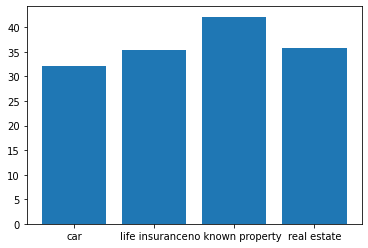

In [17]:
#For people having credit_amount more than 4000, plot a bar graph which maps property_magnitude (x-axis) to the average customer age for that magnitude (y-axis).
credit = german_credit[german_credit['credit_amount'] >= 4000]
avg_age = credit['age'].groupby(credit['property_magnitude']).mean()
pattern = plt.bar(avg_age.index, avg_age)
pattern

Text(0.5, 1.0, 'job')

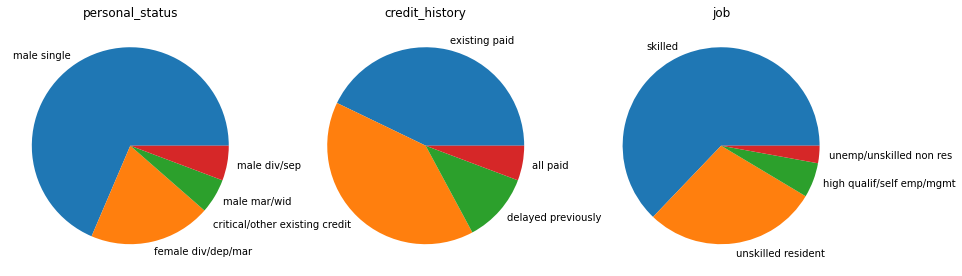

In [18]:
#For people with a "High" savings_status and age above 40, use subplots to plot the following pie charts
fig, ax = plt.subplots(1,3,figsize=(15,5))

ps_pie = german_credit.loc[(german_credit['age'] > 40) & (german_credit['savings_status'] == 'High')]['personal_status'].value_counts()
ax[0].pie(ps_pie, labels = ps_pie.index)
ax[0].set_title('personal_status')
ch_pie = german_credit.loc[(german_credit['age'] > 40) & (german_credit['savings_status'] == 'High')]['credit_history'].value_counts()
ax[1].pie(ch_pie, labels = ch_pie.index)
ax[1].set_title('credit_history')
jb_pie = german_credit.loc[(german_credit['age'] > 40) & (german_credit['savings_status'] == 'High')]['job'].value_counts()
ax[2].pie(jb_pie, labels = jb_pie.index)
ax[2].set_title('job')